## Thumnbnail Hacking 1

In [12]:
import tensorflow as tf
import pickle

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable

from tqdm.auto import tqdm
import pandas as pd

# import tensorflow.gfile as gfile
# from tensorflow.gfile import Glob
import pickle

In [5]:
# fn='/Users/stephen/Stephencwelch Dropbox/welch_labs/double_descent/hackin/cifar10-resnet18k-50k-adam/dd_cifar10-resnet18k-50k-adam_Mlist'


In [13]:
fn='/home/stephen/double_descent/cifar10-resnet18k-50k-adam/dd_cifar10-resnet18k-50k-adam_Mlist'
with tf.io.gfile.GFile(fn, "rb") as file:
    Ms = pickle.load(file)

fn='/home/stephen/double_descent/cifar10-resnet18k-50k-adam/dd_cifar10-resnet18k-50k-adam_ks'
with tf.io.gfile.GFile(fn, "rb") as file:
    ks = pickle.load(file)

In [20]:
base = 1.1
metric='Test Error'
title=''
xlabel='ResNet18 width parameter' 
p=0.0

In [30]:
plt.rcParams.update({'font.size': 16})
plt.rcParams.update({'legend.frameon': False})

def rescale_cmap(name, rescale):
    cmap = plt.cm.get_cmap(name)
    colors = []
    for i in range(256):
        x = i/256
        colors += [cmap(rescale(x))]
    return matplotlib.colors.ListedColormap(colors)

def scale(maxIdx, i):
    return np.log(i+1) / np.log(maxIdx)

/tmp/ipykernel_507285/3733858425.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(name)


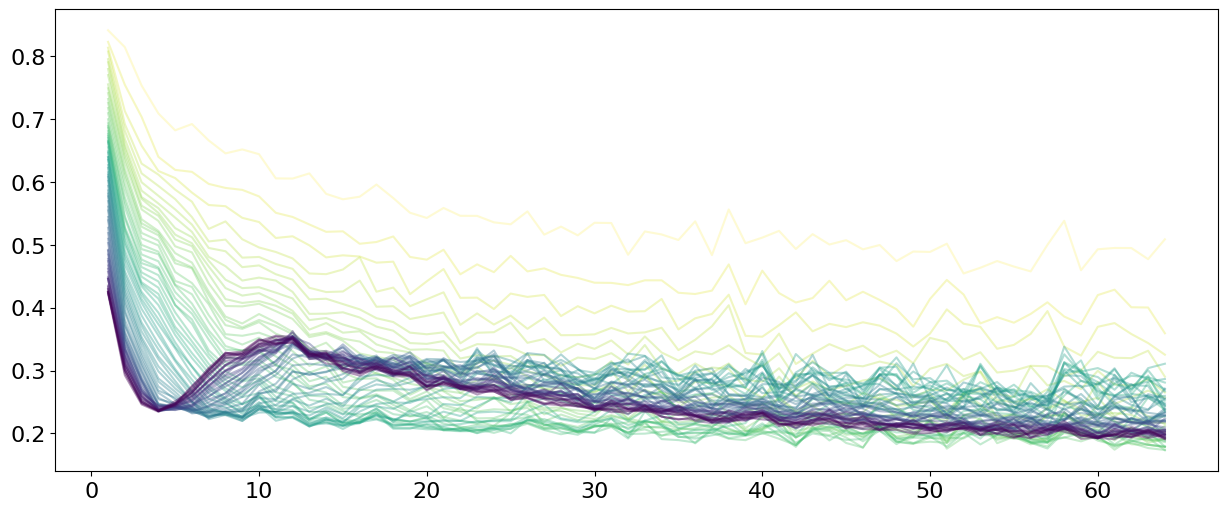

In [43]:
M = Ms[2][metric]
if metric == 'Test Error':
    M = 1.0 - (1-p)*(1-M) + M*p/9.0 # noisy test

# base = 1.1 works well. 1.01 for dense
maxIdx = M.shape[1]
idx = np.unique(np.array(base**np.arange(0, np.log(maxIdx)/np.log(base)), dtype=int) - 1)


fig, ax1 = plt.subplots(1, 1, figsize=(15, 6), sharex=True)

# cos: skews more colors to the middle of the range
# x**a: skews more colors towards the beginning/end of the range for larger/smaller a
# p cos(...) + q x: controls strength of rescaling
cmap = rescale_cmap('viridis', lambda x: 0.5 * (1 - np.cos(np.pi * x**0.7)) / 2 + 0.5 * x)
for j, i in enumerate(idx):
    #s = j / len(idx)
    s = scale(maxIdx, i)
    
    alpha=min(0.2*np.sqrt(s)+0.2, 1)
    if s == 1.0:
        alpha = 1.0
    # print(alpha) #Only peaks at 0.4, probably want to saturate moar?
    ax1.plot(ks, M[:, i], linestyle='-', color=cmap(1.0-s), alpha=alpha)

plt.savefig('/home/stephen/double_descent/harvard_curves_1.svg')

/tmp/ipykernel_507285/3733858425.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(name)


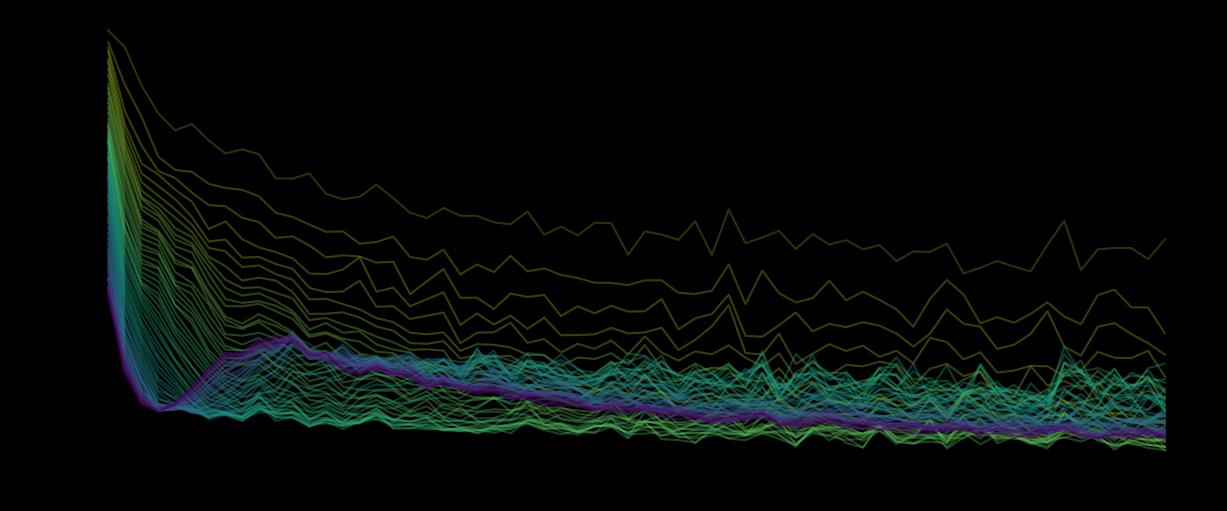

In [51]:
M = Ms[2][metric]
if metric == 'Test Error':
    M = 1.0 - (1-p)*(1-M) + M*p/9.0 # noisy test

# base = 1.1 works well. 1.01 for dense
maxIdx = M.shape[1]
idx = np.unique(np.array(base**np.arange(0, np.log(maxIdx)/np.log(base)), dtype=int) - 1)


# fig, ax1 = plt.subplots(1, 1, figsize=(15, 6), sharex=True, facecolor='k')
fig=plt.figure(0, (15, 6), facecolor='k')
ax1=fig.add_subplot(111, facecolor='k')

# cos: skews more colors to the middle of the range
# x**a: skews more colors towards the beginning/end of the range for larger/smaller a
# p cos(...) + q x: controls strength of rescaling
cmap = rescale_cmap('viridis', lambda x: 0.5 * (1 - np.cos(np.pi * x**0.5)) / 2 + 0.5 * x)
for j, i in enumerate(idx):
    #s = j / len(idx)
    s = scale(maxIdx, i)
    
    alpha=min(0.2*np.sqrt(s)+0.2, 1)
    if s == 1.0:
        alpha = 1.0
    # print(alpha) #Only peaks at 0.4, probably want to saturate moar?
    ax1.plot(ks, M[:, i], linestyle='-', color=cmap(1.0-s), alpha=alpha)

plt.savefig('/home/stephen/double_descent/harvard_curves_2.svg')

/tmp/ipykernel_507285/3733858425.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(name)


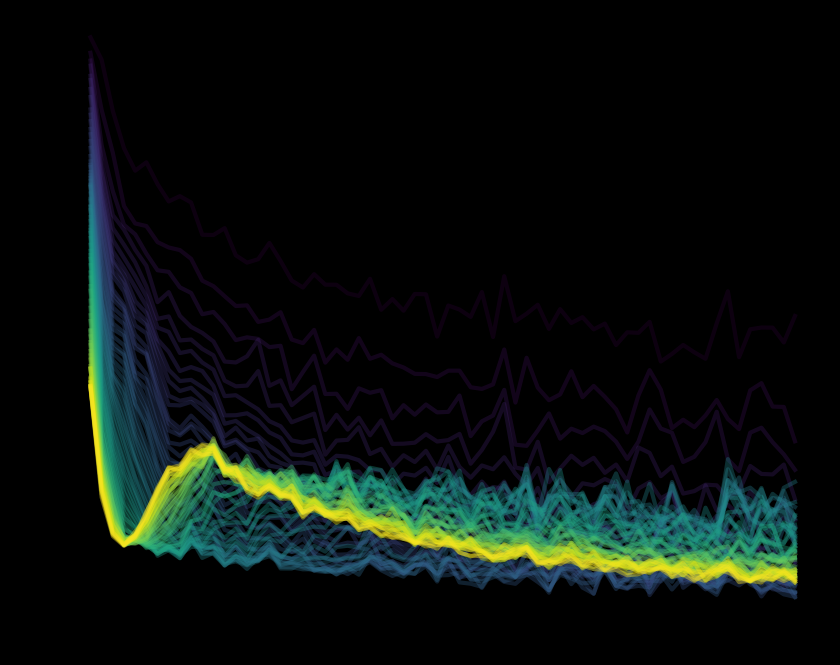

In [72]:
M = Ms[2][metric]
if metric == 'Test Error':
    M = 1.0 - (1-p)*(1-M) + M*p/9.0 # noisy test

# base = 1.1 works well. 1.01 for dense
base = 1.1
maxIdx = M.shape[1]
idx = np.unique(np.array(base**np.arange(0, np.log(maxIdx)/np.log(base)), dtype=int) - 1)


# fig, ax1 = plt.subplots(1, 1, figsize=(15, 6), sharex=True, facecolor='k')
fig=plt.figure(0, (10, 8), facecolor='k')
ax1=fig.add_subplot(111, facecolor='k')

# cos: skews more colors to the middle of the range
# x**a: skews more colors towards the beginning/end of the range for larger/smaller a
# p cos(...) + q x: controls strength of rescaling
cmap = rescale_cmap('viridis_r', lambda x: 0.5 * (1 - np.cos(np.pi * x**0.7)) / 2 + 0.5 * x)
for j, i in enumerate(idx):
    #s = j / len(idx)
    s = scale(maxIdx, i)
    
    alpha=min(0.2*np.sqrt(s)+0.2, 1) #alpha=min(0.2*np.sqrt(s)+0.2, 1)
    if s == 1.0:
        alpha = 1.0
    # print(alpha) #Only peaks at 0.4, probably want to saturate moar?
    ax1.plot(ks[:], M[:, i], linestyle='-', color=cmap(1.0-s), alpha=alpha, linewidth=3)

plt.savefig('/home/stephen/double_descent/harvard_curves_3.svg')

In [52]:
M.shape

(64, 3999)

In [53]:
idx

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         12,   13,   14,   16,   18,   20,   22,   24,   27,   29,   33,
         36,   40,   44,   48,   53,   59,   65,   71,   79,   87,   96,
        105,  116,  128,  141,  155,  170,  188,  206,  227,  250,  275,
        303,  333,  367,  404,  444,  489,  538,  592,  651,  716,  788,
        867,  954, 1050, 1155, 1270, 1398, 1537, 1691, 1861, 2047, 2252,
       2477, 2725, 2998, 3297, 3627, 3990])

In [42]:
# M = Ms[2][metric]
# if metric == 'Test Error':
#     M = 1.0 - (1-p)*(1-M) + M*p/9.0 # noisy test

# # base = 1.1 works well. 1.01 for dense
# maxIdx = M.shape[1]
# idx = np.unique(np.array(base**np.arange(0, np.log(maxIdx)/np.log(base)), dtype=int) - 1)


# fig, ax1 = plt.subplots(1, 1, figsize=(15, 6), sharex=True)

# # cos: skews more colors to the middle of the range
# # x**a: skews more colors towards the beginning/end of the range for larger/smaller a
# # p cos(...) + q x: controls strength of rescaling
# cmap = rescale_cmap('viridis_r', lambda x: 0.5 * (1 - np.cos(np.pi * x**0.7)) / 2 + 0.5 * x)
# for j, i in enumerate(idx):
#     #s = j / len(idx)
#     s = scale(maxIdx, i)
    
#     alpha=min(0.2*np.sqrt(s)+0.2, 1)
#     if s == 1.0:
#         alpha = 1.0
#     # print(alpha) #Only peaks at 0.4, probably want to saturate moar?
#     ax1.plot(ks, M[:, i], linestyle='-', color=cmap(1.0-s), alpha=alpha)

In [26]:
s

np.float64(-inf)

In [27]:
maxIdx

3999

/tmp/ipykernel_507285/3990580994.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap(name)
/tmp/ipykernel_507285/3990580994.py:16: RuntimeWarning: divide by zero encountered in log
  return np.log(i) / np.log(maxIdx)
/tmp/ipykernel_507285/3990580994.py:38: RuntimeWarning: invalid value encountered in sqrt
  alpha=min(0.2*np.sqrt(s)+0.2, 1)


ValueError: alpha (nan) is outside 0-1 range

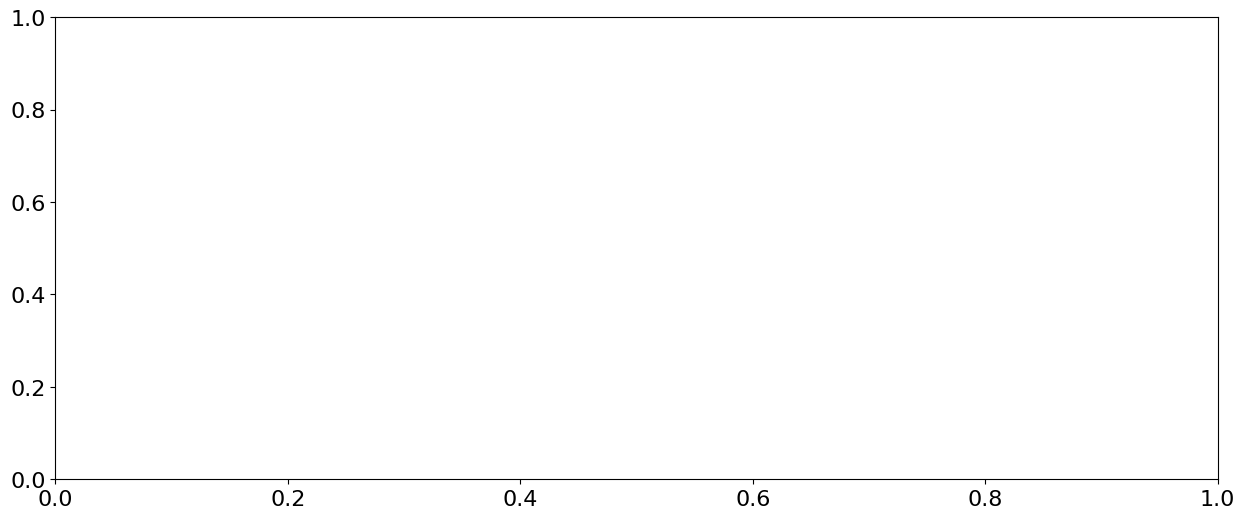

In [14]:
def plot_dynamics(Ms, ks, base = 1.1, metric='Test Error', title='', xlabel='ResNet18 width parameter', p=0.0):  
    # p: noise parameter (for noisy-test)
    




        
        
    ax1.plot(ks, M.min(axis=1), linestyle='dashed', color='red', lw=2.5, label='Optimal Early Stopping')
        
    ax1.set_ylabel(metric)
    ax1.set_xlabel(xlabel)
    ax1.xaxis.labelpad = 10
    ax1.yaxis.labelpad = 5
    #ax1.spines['top'].set_visible(False)
    #ax1.spines['right'].set_visible(False)
    ax1.legend()
    plt.tight_layout()
    
    sm = plt.cm.ScalarMappable(cmap=cmap)
    sm.set_array([])
    
    ticks = 1 - scale(maxIdx, [1, 10, 100, 1000])
    #print(ticks)
    
    cb = plt.colorbar(sm, cmap=cmap, ticks=ticks)
    cb.ax.set_yticklabels(['1', '10', '100', '1000']) 
    cb.set_label('Epochs')
    
    fig.suptitle(title)
    return fig

fig = plot_dynamics(Ms[0], ks, base = 1.1, metric='Test Error', title='', p=0.15 )